<a href="https://colab.research.google.com/github/ruksz/Zomato-Restaurant---Unsupervised-ML/blob/main/Unsupervised_ML_Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Rukshar Shaikh


# **Project Summary -**

In an era dominated by technology, the food industry has witnessed a paradigm shift in the way consumers discover and interact with restaurants. Zomato, a prominent player in the food delivery and restaurant discovery space, has become an integral part of this transformation. The aim of our project is to delve into the vast dataset provided by Zomato and employ advanced data analysis techniques, specifically clustering and sentiment analysis, to derive valuable insights that can benefit both consumers and restaurant owners.

The primary objective of the project is to enhance the user experience on the Zomato platform by grouping similar restaurants into clusters based on various features such as cuisine type, pricing, location, and user reviews. Additionally, we aim to perform sentiment analysis on user reviews to gauge the overall satisfaction level and sentiment towards specific aspects of the dining experience. By achieving these objectives, we aspire to provide users with more personalized restaurant recommendations and furnish restaurant owners with actionable insights to improve their services.

The Zomato Restaurant Clustering and Sentiment Analysis project aim to leverage the power of data science to enhance the dining experience for both users and restaurant owners. By unraveling the intricate patterns within the dataset, we strive to provide a more personalized and insightful platform that transcends traditional restaurant discovery methods. As the project unfolds, it is poised to contribute significantly to the evolution of the food industry's digital landscape, fostering a symbiotic relationship between consumers and restaurants.

# **GitHub Link -**


https://github.com/ruksz/Zomato-Restaurant---Unsupervised-ML.git

# **Problem Statement**


The project's objective is to conduct a comprehensive analysis of the Indian restaurant industry using data from Zomato, a leading restaurant aggregator and food delivery startup in India. The focus is on extracting insights from customer reviews, segmenting Zomato restaurants into distinct categories, and presenting conclusions through visualizations. The analyzed data encompasses details about cuisine types, pricing, and customer sentiments. The primary goal is to provide customers with valuable information for choosing the best local restaurants while aiding Zomato in pinpointing areas for industry growth and enhancement. Moreover, the project aims to utilize sentiment analysis to identify industry critics based on reviewer metadata.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [95]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time

import scipy.stats as stats


### Dataset Loading

In [96]:
# Load Dataset

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [97]:
hotel_df = pd.read_csv('/content/drive/MyDrive/MLProject/Zomato Restaurant names and Metadata.csv')

In [98]:
review_df = pd.read_csv('/content/drive/MyDrive/MLProject/Zomato Restaurant reviews.csv')

In [99]:
# Dataset First Look
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [100]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Restaurant row & col count :{hotel_df.shape}')
print(f'Review row & col count : {review_df.shape}')

Restaurant row & col count :(105, 6)
Review row & col count : (10000, 7)


### Dataset Information

In [101]:
# Dataset Info

print('Restaurant Dataset Info')
hotel_df.info()
print('*' *50)
print('Review Dataset Info')
review_df.info()

Restaurant Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
**************************************************
Review Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   P

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
hotel_df.duplicated().value_counts()

False    105
dtype: int64

In [10]:
print(f'{hotel_df.duplicated().sum()} duplicate values')

0 duplicate values


In [11]:
review_df.duplicated().value_counts()

False    9964
True       36
dtype: int64

In [12]:
print(f'{len(review_df[review_df.duplicated()])} duplicate values')

36 duplicate values


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
#for restaurant dataset
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [14]:
#for review dataset
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [15]:
# Visualizing the missing values

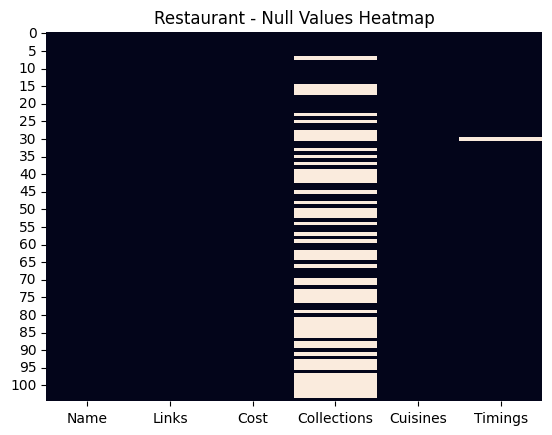

In [16]:
sns.heatmap(hotel_df.isnull(), cbar=False)
plt.title('Restaurant - Null Values Heatmap')
plt.show()

Text(0.5, 1.0, 'Reviews - Null Values Heatmap')

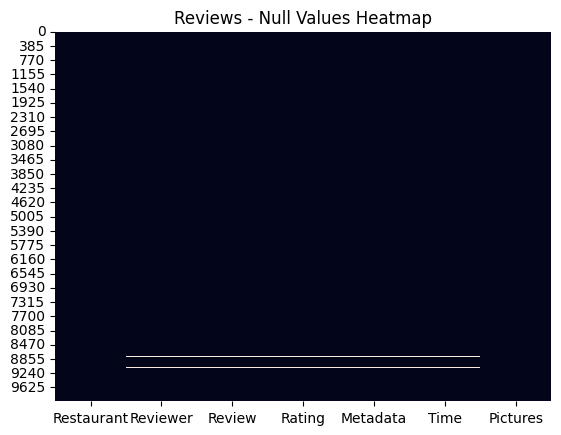

In [17]:
sns.heatmap(review_df.isnull(), cbar=False);
plt.title('Reviews - Null Values Heatmap')

### What did you know about your dataset?

# Restaurant Dataset

The dataset comprises 105 records with 6 distinct features and no duplicates.

Notably, the "collection" and "timing" features contain null values.

The "cost" feature, denoting monetary values, is currently of object data type due to values being separated by commas.  Similarly, the "timing" feature, representing operational hours, is in text format and also has an object data type.

# Review Dataset


The dataset comprises 10000 records with 7 distinct features and no duplicates.

A pattern is observed with 36 duplicate entries associated with two specific restaurants, "American Wild Wings" and "Arena Eleven." Interestingly, these duplicate entries tend to consist mostly of null values.

Except picture and restaurant feature all others have null values.

The "rating" feature, which signifies ordinal data, is currently in object data type. To enhance its usability and ensure accurate analysis, it should be converted into an integer data type. Similarly, the "timing" feature, representing the time when reviews were posted, is currently in object data type. Converting it into datetime format would facilitate more meaningful time-related analyses.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
hotel_df.columns.to_list()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [19]:
review_df.columns.to_list()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [20]:
# Dataset Describe
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [21]:
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

# Zomato Restaurant Dataset Variables

Name : Name of Restaurant

Links : URL Links of Restaurant

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurant

Timings : Restaurant Timings

# Zomato Restaurant Reviews Dataset Variables

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
# for restaurant dataset
for i in hotel_df.columns.tolist():
  print("Unique values in ",i,"is: ",hotel_df[i].nunique())

print("*" *50)
# for review dataset
for i in review_df.columns.tolist():
  print("Unique values in ",i,"is: ",review_df[i].nunique())

Unique values in  Name is:  105
Unique values in  Links is:  105
Unique values in  Cost is:  29
Unique values in  Collections is:  42
Unique values in  Cuisines is:  92
Unique values in  Timings is:  77
**************************************************
Unique values in  Restaurant is:  100
Unique values in  Reviewer is:  7446
Unique values in  Review is:  9364
Unique values in  Rating is:  10
Unique values in  Metadata is:  2477
Unique values in  Time is:  9782
Unique values in  Pictures is:  36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
#creating copy of both the datasets
hotel = hotel_df.copy()
review = review_df.copy()

# For Restaurant

In [24]:
hotel.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [25]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [26]:
# spliting the cusines and storing in list
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [27]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [28]:
# converting the dict to a dataframe
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [29]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [30]:
# spliting the collections and storing in list
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [31]:
# storing all the collection tags in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [32]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [33]:
#top 5 collection tags
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


# For Reviews

In [34]:
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [35]:
#checking values for rating
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [36]:
#changing data type for each rating since it has value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [37]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [38]:
#changing date and extracting few feature for manipulation

#extracting tot_reviews & followers from Metadata
review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])

#extracting y,m,h from Time
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour


<ipython-input-38-08d70f2f6739>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str


In [39]:
#finding hotel without review
hotel_without_review = [name for name in hotel.Name.unique().tolist()
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

### What all manipulations have you done and insights you found?

I initiated the process by adjusting the data types for both the "cost" and "rating" columns. Notably, the "rating" column contained a singular rating represented as a string or the word "like." To ensure uniformity and consistency in the data, I transformed these varied ratings into the median value of the rating. This step was taken to standardize the data and ensure a consistent format for analysis.

In restaraunt dataset cusine type column and collection feature was further splitted to found that north indian cuisine with great buffet tags is mostly used in hotels.

In review dataset , I extracted total reviews & no of follwoers from the metadata feature also extracted year,month & hour from the time feature. It was also noted that there are 5 restaruants with no review.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [40]:
# Chart - 1 visualization code

#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')

In [41]:
#Price_point of restaurants
price_p = merged.groupby('Restaurant').agg({'Rating':'mean', 'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [42]:
#price point for 5 high rated restaurants
high_pp= price_p.sort_values('Rating',ascending = False)[:10]
high_pp

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0
87,The Indi Grill,4.60,1500.0
97,Zega - Sheraton Hyderabad Hotel,4.45,1750.0
64,Over The Moon Brew Company,4.34,1200.0
16,Beyond Flavours,4.28,800.0
19,Cascade - Radisson Hyderabad Hitec City,4.26,1800.0


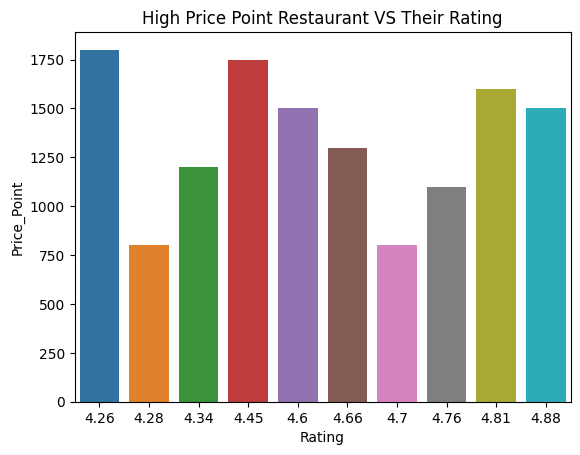

In [43]:
sns.barplot(data = high_pp, x = 'Rating', y = 'Price_Point')
plt.title('High Price Point Restaurant VS Their Rating')
plt.show()

In [44]:
#price point for high rated restaurants
low_pp= price_p.sort_values('Rating')[:10]
low_pp

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0
78,Shree Santosh Dhaba Family Restaurant,2.830,500.0
83,The Chocolate Room,2.830,600.0
47,KFC,2.850,500.0
21,Club Rogue,2.880,900.0
26,Desi Bytes,2.900,400.0


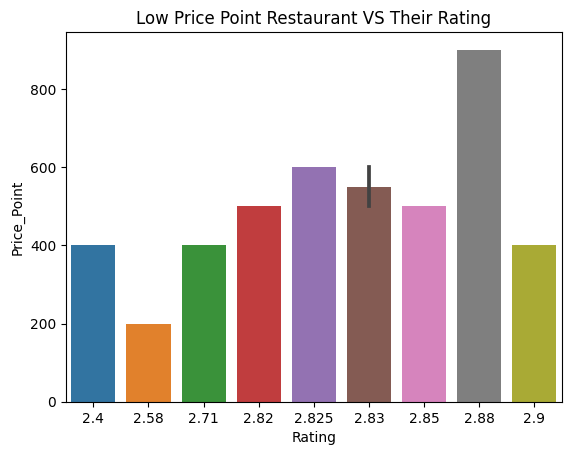

In [45]:
sns.barplot(data = low_pp, x = 'Rating', y = 'Price_Point')
plt.title('Low Price Point Restaurant VS Their Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot for the above graph as it shows ratings of restaurants w.r.t their price points for both top 10 high & low rated hotels.

##### 2. What is/are the insight(s) found from the chart?

High price point restaurants have more high quality(good) ratings comapre to low price point ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The most-liked restaurant charges around 1500, slightly above average, indicating a focus on high-quality food. Analyzing reviews can reveal why this price point is preferred. Conversely, low-rated restaurants with lower prices struggle to engage customers, posing a potential negative impact on business.

#### Chart - 2

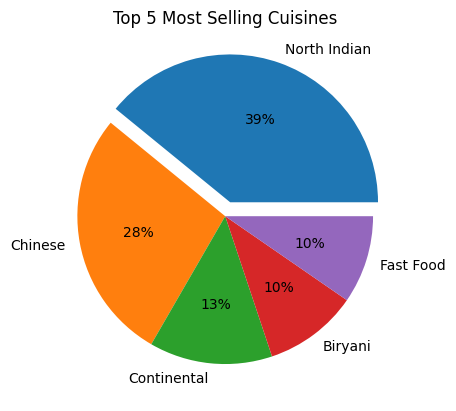

In [46]:
# Chart - 2 pie chart for top 5 most selling cuisines in restaraunts

cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]
restaraunt_per = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]

labels = cuisine_list
explode = (0.1, 0, 0, 0, 0)
#pie chart
plt.pie(restaraunt_per, labels = labels, explode=explode, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisines')
plt.show()

##### 1. Why did you pick the specific chart?

Creating a pie chart for cuisine types can reveal the favorites among customers and highlight the most popular ones.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly indicates that North Indian cuisine is the top-selling food in most hotels, closely followed by Chinese cuisine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights about popular cuisines can positively impact the business by informing strategic decisions. However, there's a risk of negative impact if there's an exclusive focus on popular cuisines without considering changing preferences or the need for diversification to attract a broader customer base.

#### Chart - 3

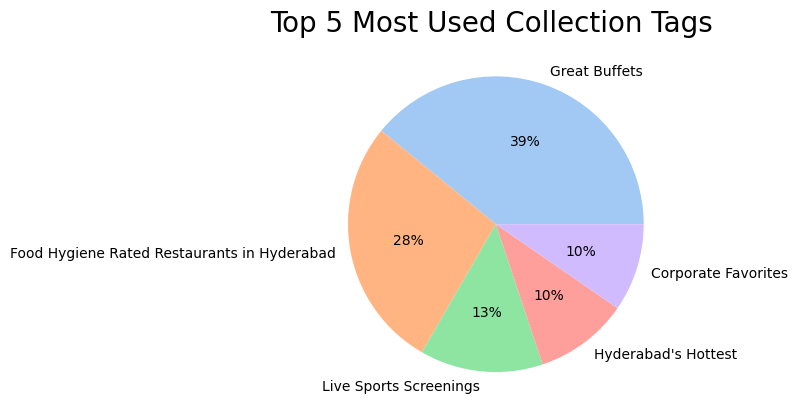

In [47]:
# Chart - 3 visualization code

collection_list = Collections_df.sort_values('Number of Restaurants', ascending = False)['Tags'].tolist()[:5]

restaraunt_per = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]

labels = collection_list
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(restaraunt_per, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Used Collection Tags ', size =20)
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart offers a straightforward and clear visualization, allowing easy identification of the proportion of various food attributes. This makes it simple to pinpoint the most popular attributes and compare them with one another.

##### 2. What is/are the insight(s) found from the chart?

The tag "Great Buffets" is the most commonly used, and other frequently employed tags include "Great," "Best," "North," and "Hyderabad."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights, such as the popularity of tags like "Great Buffets," "Best," and "Hyderabad," can positively impact the business through targeted marketing. However, there's a risk of negative growth if there's an overemphasis on specific tags, potentially limiting the appeal to a diverse customer base. Strategic diversification and balanced marketing can mitigate this risk.

#### Chart - 4

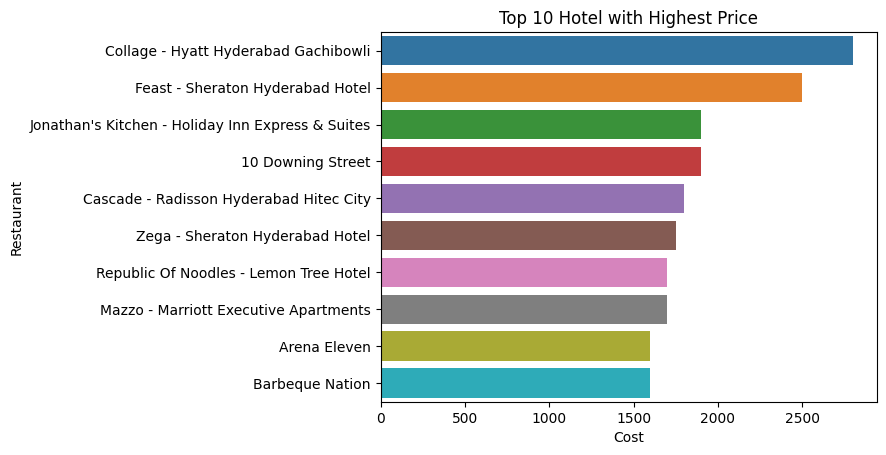

In [48]:
# Chart - 4 Restaraunt with Highest Price and Lowest Price

price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

#hotel with max price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

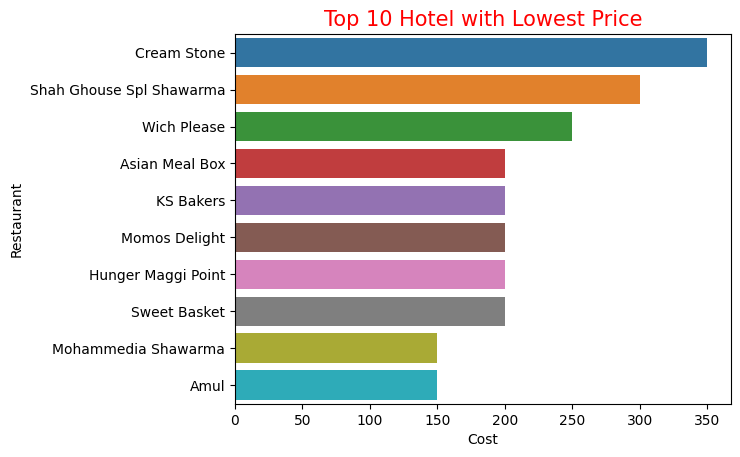

In [49]:
#hotel with min price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot for top 10 restaruants with high/low prices

##### 2. What is/are the insight(s) found from the chart?

The analysis of the chart reveals that the restaurant "Collage - Hyatt Hyderabad Gachibowli" is the most expensive establishment in the locality, charging 2800 for an order.

Conversely, budget-friendly options like "Amul" and "Mohammedia Shawarma" stand out as the least expensive, priced at 150.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights about restaurant pricing can positively impact the business by informing strategic decisions and targeting diverse audiences. However, there's a potential negative impact if pricing is not effectively communicated or if increased competition arises. Strategic communication and diversification of offerings can help mitigate these challenges.

#### Chart - 5

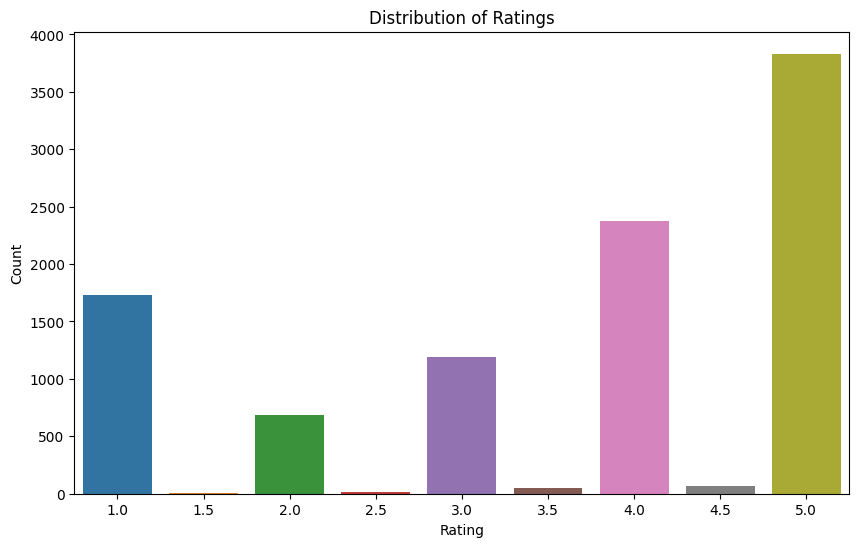

In [50]:
#chart 5 Rating Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=review)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

This count plot, is suitable for visualizing the distribution of categorical data, specifically the distribution of different rating values in the 'review' dataset

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the distribution of ratings in the dataset, helping identify the most common ratings, assess sentiment polarity, and spot any unusual or rare ratings. It gives a quick overview of how reviewers generally rate the items or experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from ratings can positively impact business by guiding improvements, enhancing customer satisfaction, and providing a competitive edge through strategic decision-making.

#### Chart - 6

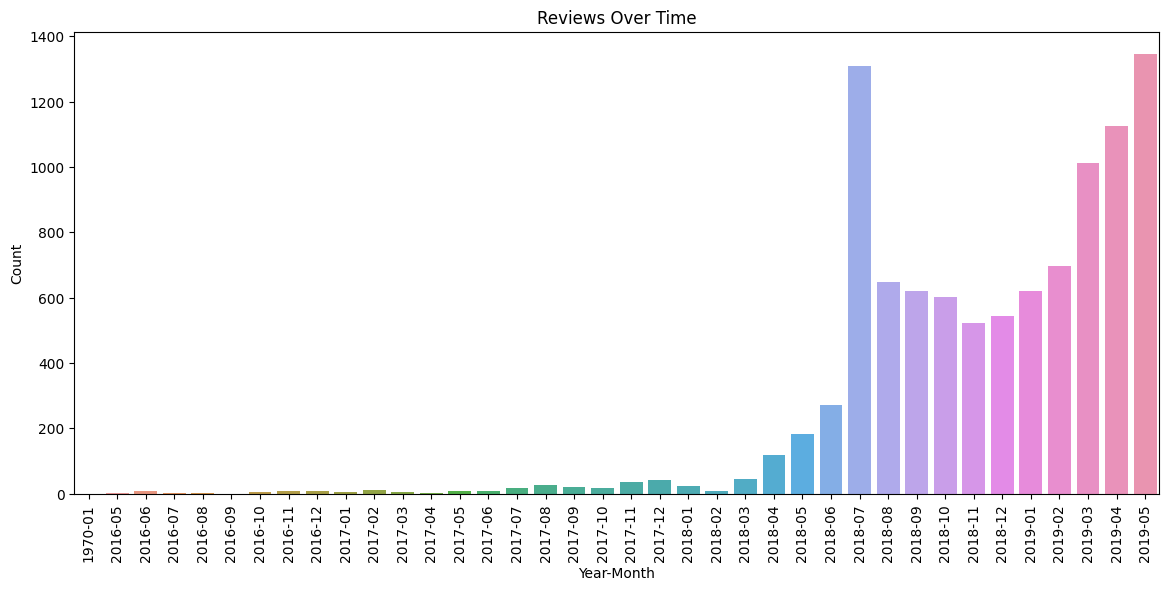

In [51]:
# Chart - 6 Reviews Over Time

review['Review_YearMonth'] = review['Time'].dt.to_period('M')
plt.figure(figsize=(14, 6))
sns.countplot(x='Review_YearMonth', data=review.sort_values('Review_YearMonth'))
plt.title('Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Chose a time-series count plot ('Reviews Over Time') to visualize the distribution of reviews over different months, offering a clear chronological perspective.

##### 2. What is/are the insight(s) found from the chart?

Temporal Trends: The chart reveals how the volume of reviews changes over time, highlighting periods of increased review activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can aid in planning for peak review times, adjusting resources or marketing efforts accordingly, potentially enhancing customer engagement.

#### Chart - 7

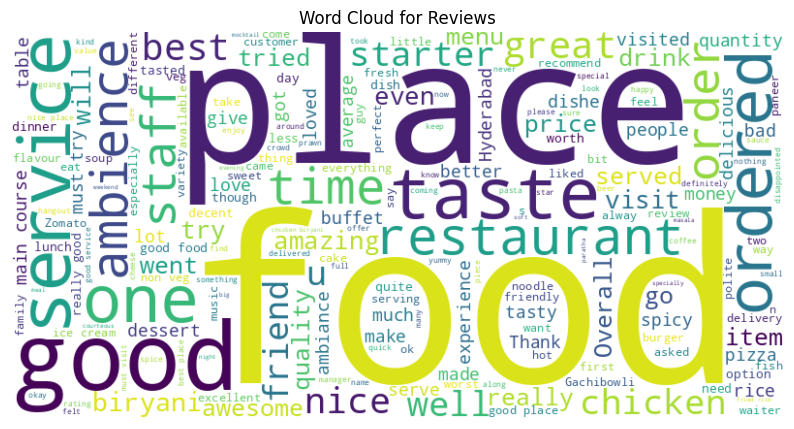

In [52]:
# Chart - 7 Word Cloud for Reviews
from wordcloud import WordCloud

text = ' '.join(review['Review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this to visually represent the most frequent words in reviews. Word Clouds provide a quick, engaging summary of the most prominent words in a text corpus.

##### 2. What is/are the insight(s) found from the chart?

Identifies frequently mentioned words in reviews like good place, food,service, taste and more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps businesses understand prevalent customer sentiments and concerns.It can guide product improvements, marketing strategies, and customer satisfaction initiatives. Provides actionable insights for enhancing the overall customer experience.

#### Chart - 8

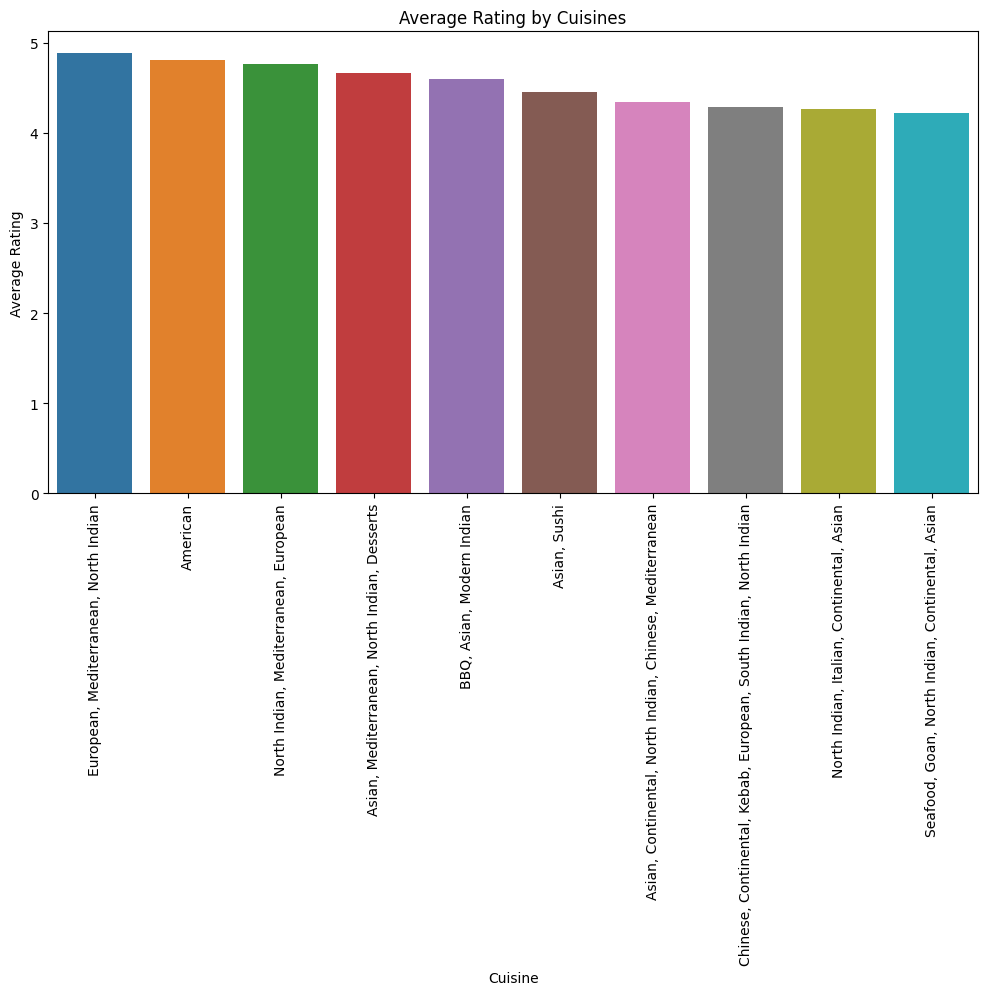

In [53]:
# Chart - 8 Average Rating by Cuisines
merged_df = pd.merge(review, hotel, on='Restaurant', how='inner')


avg_rating_by_cuisines = merged_df.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_cuisines.index, y=avg_rating_by_cuisines.values)
plt.title('Average Rating by Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because it effectively compares average ratings for the top 10 cuisines. Clear visualization for comparisons.

##### 2. What is/are the insight(s) found from the chart?

Top cuisines with the highest average ratings- European, Mediterranean, North Indian, are preferred cuisines among reviewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, businesses can focus on popular cuisines with high ratings, potentially attracting more customers and enhancing overall satisfaction.

#### Chart - 9

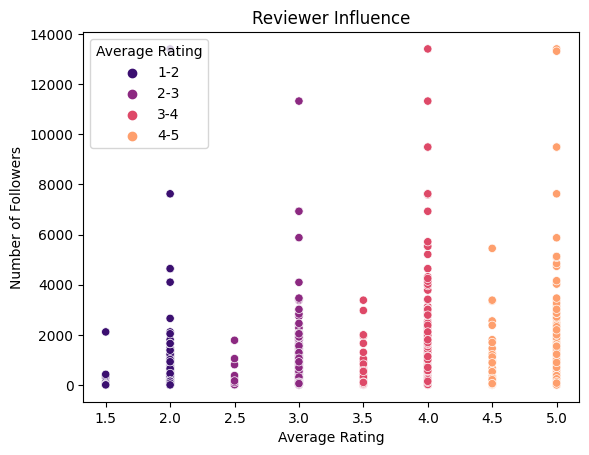

In [54]:
# Chart - 9  Reviewer Influence
sns.scatterplot(x='Rating', y='Reviewer_Followers', hue=pd.cut(review['Rating'], bins=[1, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5']), data=review, palette='magma')

plt.title('Reviewer Influence')

plt.xlabel('Average Rating')
plt.ylabel('Number of Followers')

plt.legend(title='Average Rating')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot visualize the relationship between the number of followers a reviewer has ('Reviewer_Followers') and the average rating given. The use of bins allows for a segmented view of different rating levels.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into how the number of followers influences the average rating given by reviewers. It helps identify patterns in rating behavior across different levels of reviewer influence like influencers who rate between 1-2 have less followers compare to others. Whereas, max average ratings is between 3-4 and these influencers have different range of followers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can guide strategies to engage influential reviewers, potentially improving the business's reputation and attracting a larger audience.

#### Chart - 14 - Correlation Heatmap

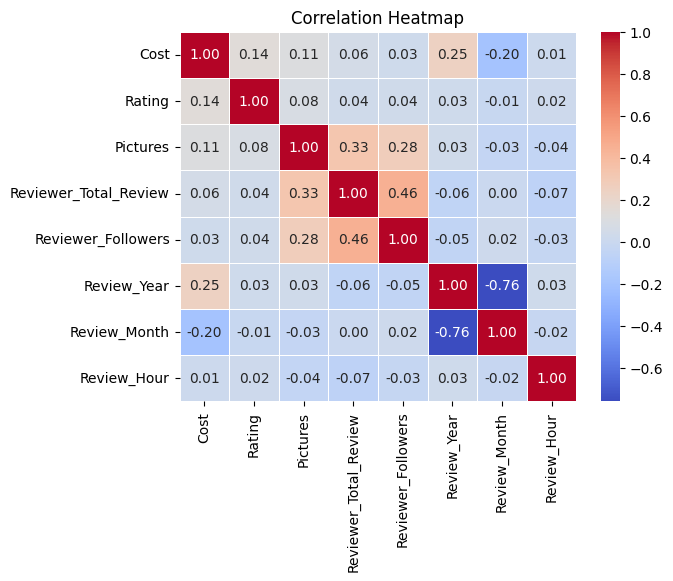

In [55]:
# Correlation Heatmap visualization code

# Select relevant columns for correlation analysis
numeric_columns = merged.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a tabular representation of correlation coefficients between variables, where each cell displays the correlation between two variables. Ranging from -1 to 1, correlation coefficients measure the strength and direction of relationships.

##### 2. What is/are the insight(s) found from the chart?

There is a correlation between the total number of reviews by a reviewer and the number of followers. Additionally, a correlation is observed between the total reviews and the inclusion of pictures in the reviews. Further correlations can be inferred from the visual representation provided by the heatmap.

#### Chart - 15 - Pair Plot

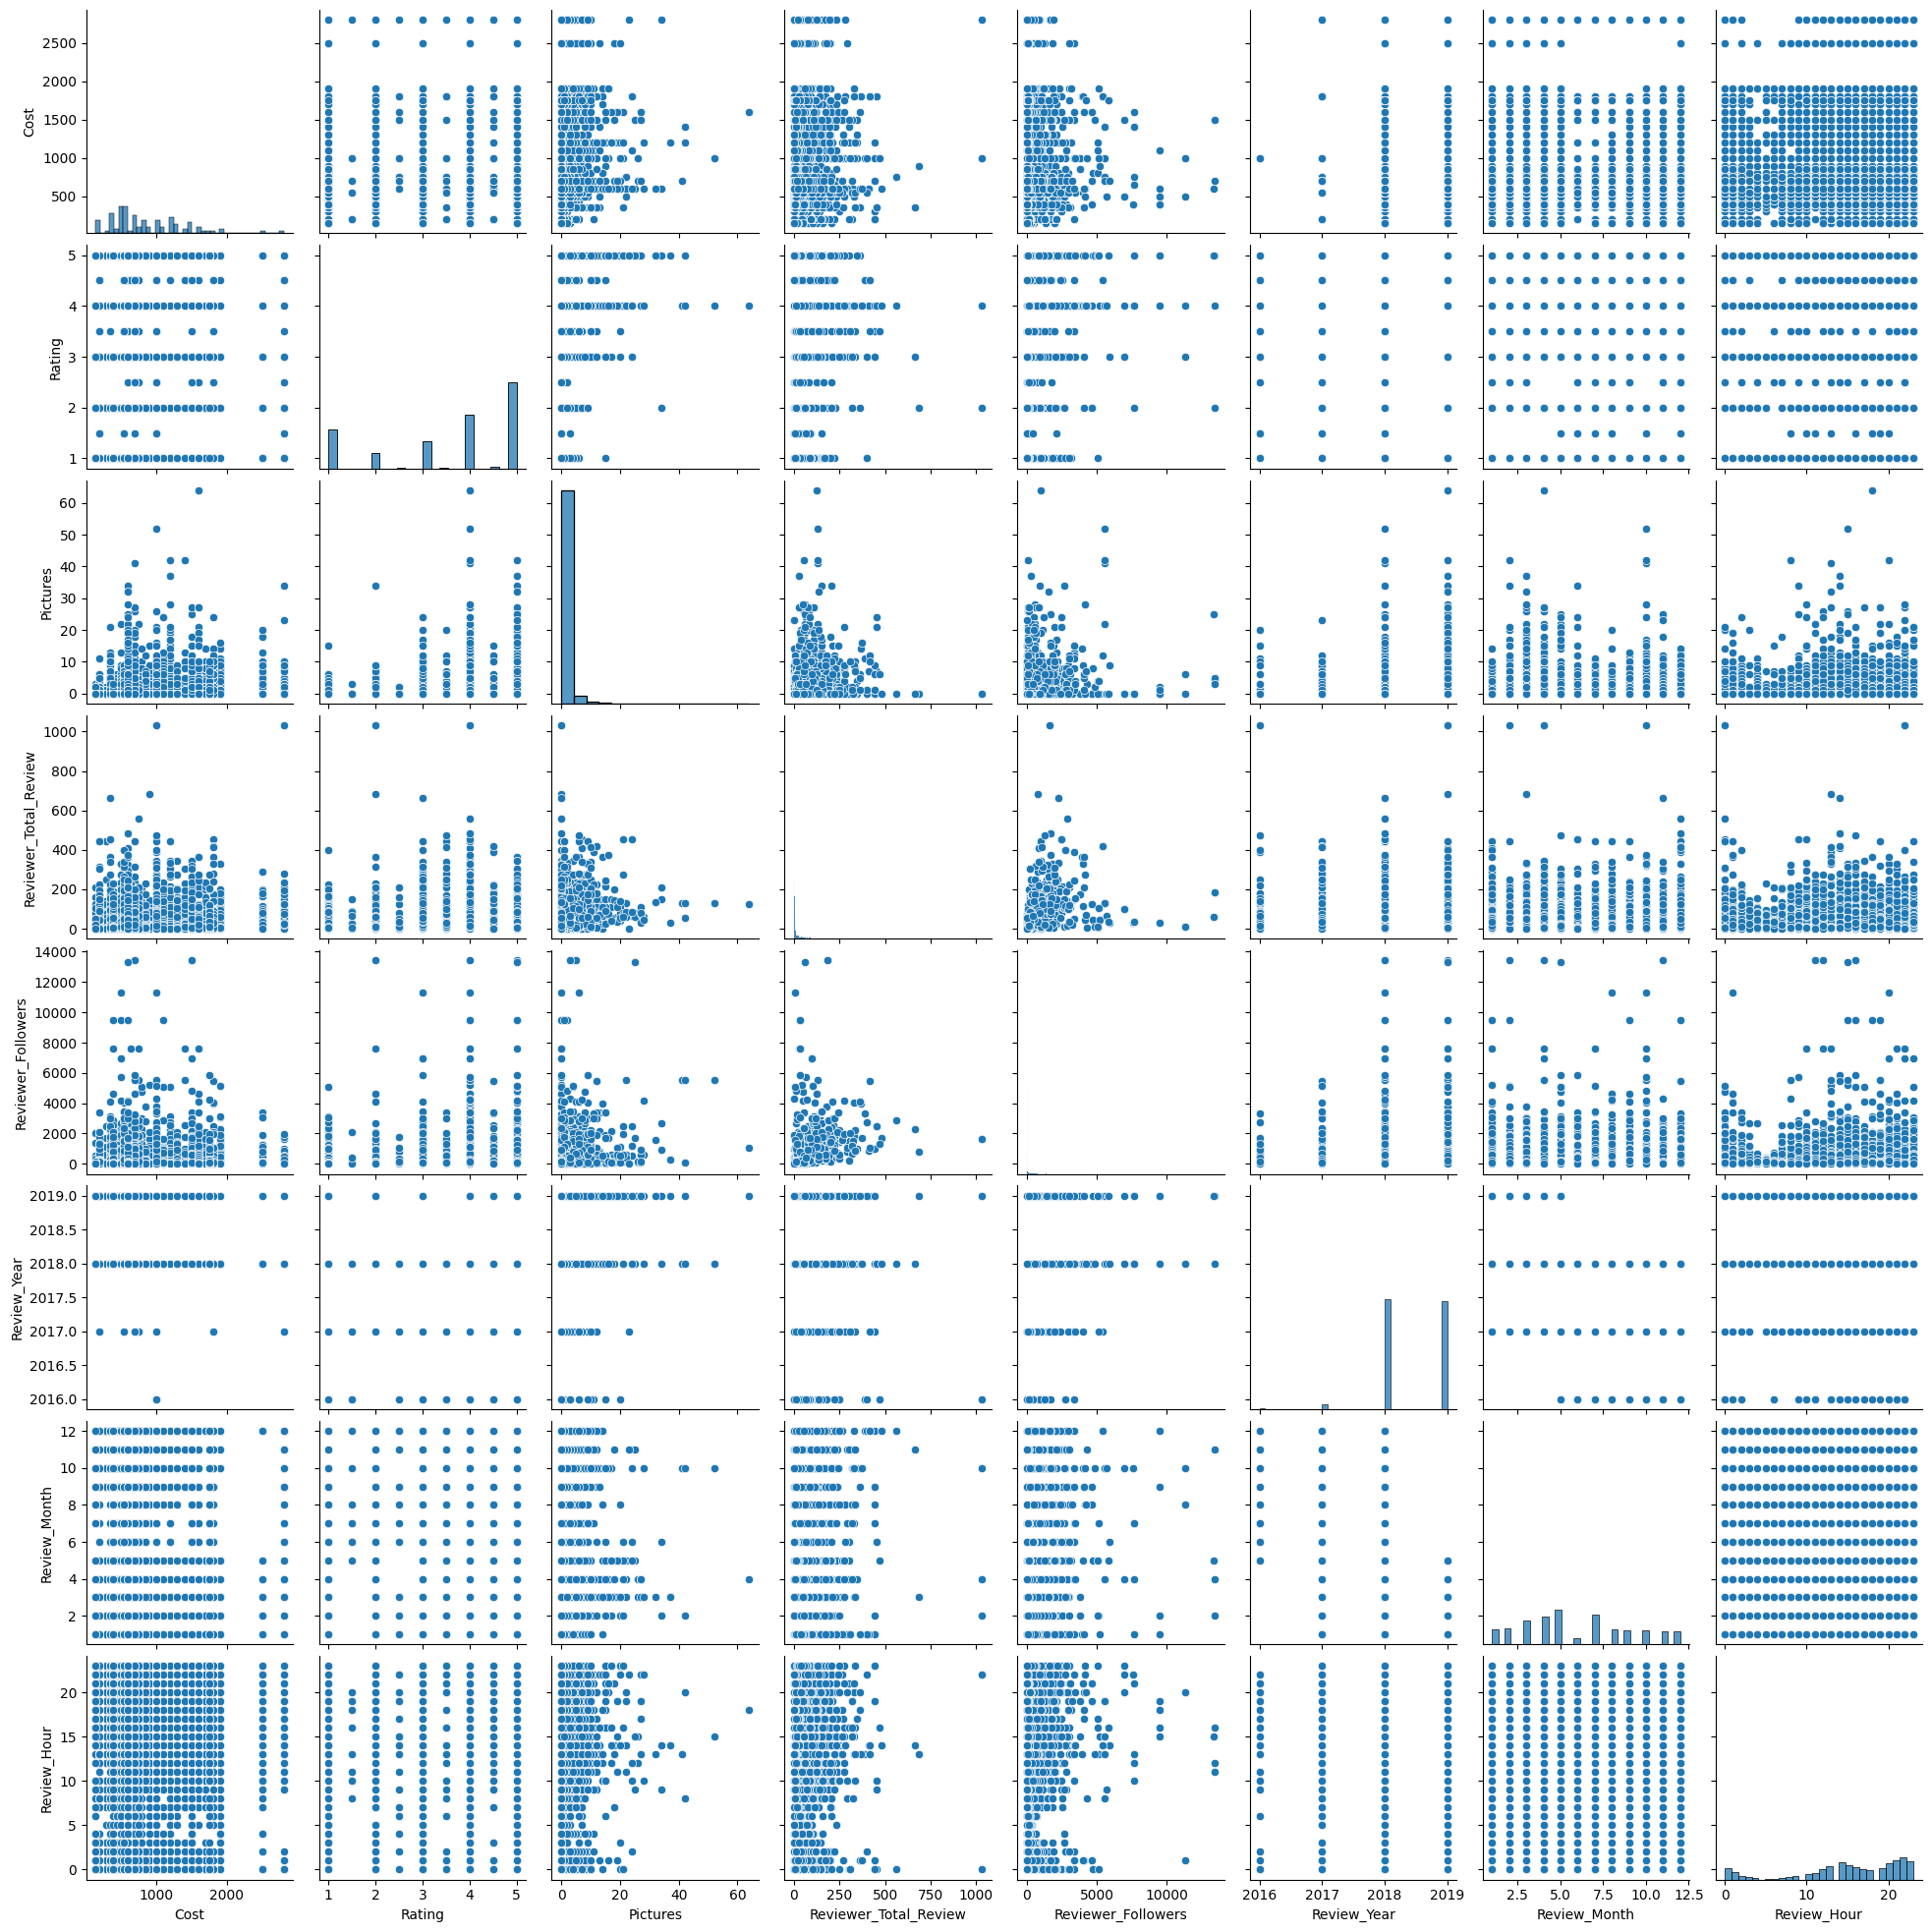

In [56]:
# Pair Plot visualization code
sns.pairplot(merged)

##### 1. Why did you pick the specific chart?

A pair plot visually explores relationships and patterns between variables, helping identify key features for classification. It provides a graphical representation, similar to a correlation map but with a focus on visual patterns.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the merged dataframe indicates a lack of substantial correlation among the provided features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Restaurants that offer a wider variety of cuisines will have a higher rating.

Relationship between Restaurant Cost and Rating

Restaurants reviewed by reviewers with a larger following will receive higher ratings compared to those reviewed by reviewers with a smaller following.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Restaurants that offer a wider variety of cuisines will have a higher rating.

Null Hypothesis (H0): The average rating of restaurants offering a wider variety of cuisines is the same as or lower than the average rating of restaurants with a narrower variety of cuisines.

Alternative Hypothesis (H1): The average rating of restaurants offering a wider variety of cuisines is higher than the average rating of restaurants with a narrower variety of cuisines.

#### 2. Perform an appropriate statistical test.

In [57]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [58]:
# Perform Statistical Test to obtain P-Value

merged_df = pd.merge(hotel, review, on='Restaurant')

# Create two groups: restaurants with a wider variety of cuisines and narrower variety
wider_variety = merged_df[merged_df['Cuisines'].str.count(',') >= 2]['Rating']
narrower_variety = merged_df[merged_df['Cuisines'].str.count(',') < 2]['Rating']

missing_values_wider = wider_variety.isnull().sum()
missing_values_narrower = narrower_variety.isnull().sum()

print(f'Missing values in wider_variety: {missing_values_wider}')
print(f'Missing values in narrower_variety: {missing_values_narrower}')

# Replacing missing values with 0 for the purpose of the t-test
wider_variety = wider_variety.replace(np.nan, 0)
narrower_variety = narrower_variety.replace(np.nan, 0)

# Setting the significance level
alpha = 0.05


# Performing independent t-test
t_stat, p_value = stats.ttest_ind(wider_variety, narrower_variety, equal_var=False)

# Printing the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings.")

Missing values in wider_variety: 23
Missing values in narrower_variety: 15
T-statistic: 4.631686447771217
P-value: 3.6949249270765484e-06
Reject the null hypothesis. There is a significant difference in ratings.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was an independent two-sample t-test.

##### Why did you choose the specific statistical test?

The t-test was chosen as it's suitable for comparing the means of two independent groups (restaurants with different cuisine varieties) and is appropriate for continuous data with normal distribution and independence between samples.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:
There is a significant relationship between the cost of dining at a restaurant and the ratings it receives.

Null Hypothesis (H0):
The cost of dining does not have a significant impact on the ratings given to restaurants.

Alternative Hypothesis (H1):
The cost of dining has a significant influence on the ratings given to restaurants.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value



merged_df_cleaned = merged_df.dropna(subset=['Cost', 'Rating'])

# Performing Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(merged_df_cleaned['Cost'], merged_df_cleaned['Rating'])

# Printing the results
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

# Setting the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between cost and ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between cost and ratings.")

Correlation Coefficient: 0.14363265484190832
P-value: 4.595644071496579e-47
Reject the null hypothesis. There is a significant relationship between cost and ratings.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?

The Pearson correlation test was chosen because it assesses the strength and direction of a linear relationship between two continuous variables. In this case, we are interested in understanding if there is a significant linear relationship between the cost of dining and the ratings of restaurants. The Pearson correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. The associated p-value helps determine whether the observed correlation is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:
Restaurants reviewed by reviewers with a larger following will receive higher ratings compared to those reviewed by reviewers with a smaller following.

Null Hypothesis (H0):
There is no significant difference in the ratings of restaurants based on the size of the reviewer's following.

Alternative Hypothesis (H1):
Restaurants reviewed by reviewers with a larger following receive significantly higher ratings than those reviewed by reviewers with a smaller following.



#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

review_cleaned = review.dropna(subset=['Rating', 'Reviewer_Followers'])

# Separating ratings based on reviewer's following size
larger_following = review_cleaned[review_cleaned['Reviewer_Followers'] > review_cleaned['Reviewer_Followers'].median()]
smaller_following = review_cleaned[review_cleaned['Reviewer_Followers'] <= review_cleaned['Reviewer_Followers'].median()]

# Performing independent t-test
t_stat, p_value = stats.ttest_ind(larger_following['Rating'], smaller_following['Rating'], equal_var=False)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings based on reviewer's following size.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings based on reviewer's following size.")


T-statistic: 3.9321951485566093
P-value: 8.488855232307167e-05
Reject the null hypothesis. There is a significant difference in ratings based on reviewer's following size.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the independent t-test.

##### Why did you choose the specific statistical test?

The independent t-test was chosen because it is suitable for comparing the means of two independent groups. In this case, I'm comparing the mean ratings of restaurants reviewed by reviewers with a larger following to those with a smaller following. The t-test assumes normal distribution of the data and is appropriate when comparing continuous variables. The choice of the t-test is based on the assumption that the ratings are approximately normally distributed, and it provides a measure of whether the observed difference in means is statistically significant.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Treating Duplicate Values**

In [61]:
hotel.duplicated().value_counts()

False    105
dtype: int64

In [62]:
review.duplicated().value_counts()

False    9964
True       36
dtype: int64

In [63]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [64]:
#deleting duplicate value from hotel dataset
hotel = hotel.drop_duplicates()

In [65]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")
print(f"Anymore duplicate left ? {hotel.duplicated().value_counts()}, unique values with {len(hotel[hotel.duplicated()])} duplication")

Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication
Anymore duplicate left ? False    105
dtype: int64, unique values with 0 duplication


**Missing Values Handling**

***Hotel Dataset***

In [66]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [67]:
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [68]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [69]:
#checking null values in Collections
missing_per= ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_per, 2)}%')

Percentage of missing value in Collections is 51.43%


In [70]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [71]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

***Review Dataset***

In [72]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
Review_YearMonth            2
dtype: int64

In [73]:
#checking null reviewer
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Review_YearMonth
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaT
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaT


In [74]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Review_YearMonth
7601,4.0,4.0,4.0,4.0,4.0,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.0,1.0,0.0,1970-01
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaT
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaT


In [75]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [76]:
#checking the remaining values again
null_counter = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counter

[('Review', 7), ('Reviewer_Followers', 1578)]

In [77]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [78]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
Review_YearMonth         0
dtype: int64

In [79]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 17)

#### What all missing value imputation techniques have you used and why did you use those techniques?

For the 'Timing' feature:

There was only one null value in the 'Timing' feature.
I replaced this null value with the mode (the most frequently occurring value) since it is robust to outliers.
The decision to use the mode was made considering that the 'Timing' feature had a small number of missing values and the data associated with the hotel name was unique.

For the 'Collection' feature:

There were more than 50% null values in the 'Collection' feature.
Due to the high percentage of missing values, I chose to remove the entire 'Collection' column.
The decision to remove the column was based on the consideration that columns with a significant proportion of null values might introduce uncertainty and challenges in accurate analysis or predictions.

FOr 'Reviewer' and 'Reviewer_Total_Review':

I removed both the 'Reviewer' and 'Reviewer_Total_Review' columns from the dataset had all null values. After removing these columns, the null values in other features were reduced to zero, except for 'Review' and 'Reviewer_Followers'.

For the 'Review' feature (textual data), I replaced the 7 null values with the string 'no review'.

For the 'Reviewer_Followers' feature, I assumed a default value of 0, considering that follower count is metadata for reviewers and it can be 0.

Duplicated data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as there were less duplicate data which had no unique identity.

All missing values were addressed, and finally, I proceeded to merge both the hotel and review datasets once more.

### 2. Handling Outliers

In [80]:
numerical_features = merged_df[['Cost', 'Reviewer_Followers']]

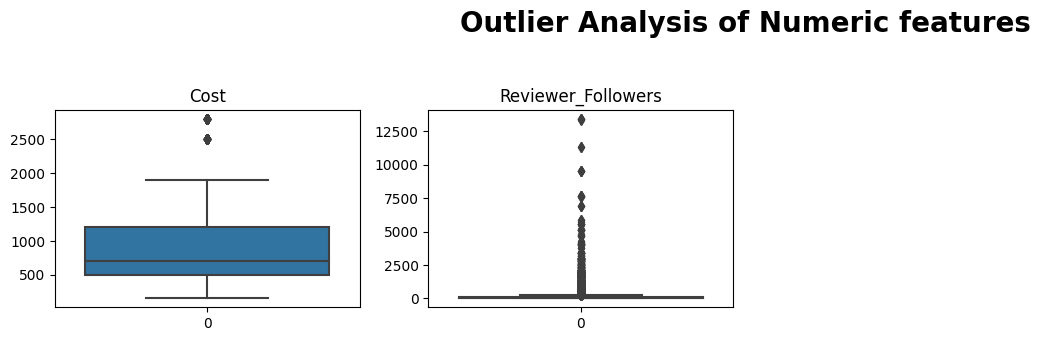

In [81]:
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outlier Analysis of Numeric features', fontsize = 20, fontweight='bold', y=1.02)

for index , col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(4,4, index+1)
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()


In [82]:
# Handling Outliers & Outlier treatments

#Anamoly detection

from sklearn.ensemble import IsolationForest

summary_stats = merged[['Cost', 'Reviewer_Followers']].describe()
# Calculate skewness and kurtosis directly
skewness_cost = merged['Cost'].skew()
kurtosis_cost = merged['Cost'].kurt()
skewness_followers = merged['Reviewer_Followers'].skew()
kurtosis_followers = merged['Reviewer_Followers'].kurt()

# Print the results
print("Skewness - Cost: %f" % skewness_cost)
print("Kurtosis - Cost: %f" % kurtosis_cost)
print("Skewness - Reviewer_Followers: %f" % skewness_followers)
print("Kurtosis - Reviewer_Followers: %f" % kurtosis_followers)


Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


<ipython-input-83-d06648207f21>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged['Cost'])


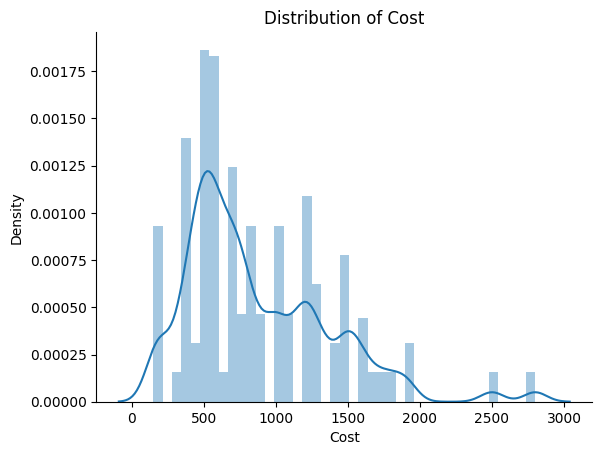

In [83]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

<ipython-input-84-9498aee16a01>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged['Reviewer_Followers'])


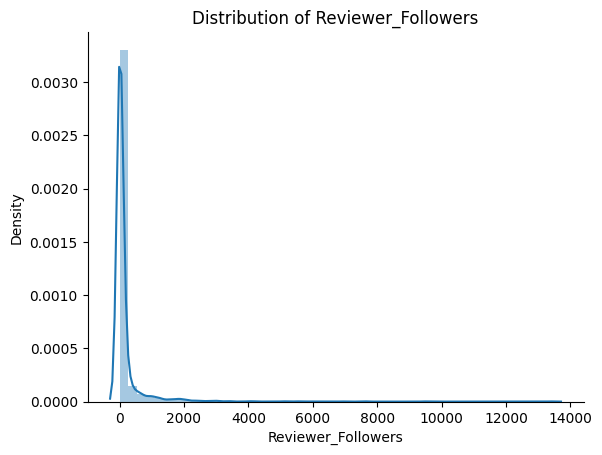

In [84]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [85]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

In [86]:
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [87]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))

In [88]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge


# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]


# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]


#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Given the positively skewed distribution observed in the 'Cost' and 'Reviewer_Followers' features, identified outliers using the isolation forest method. Instead of outright removal, a capping technique was employed to handle outliers. The capping was performed using the Interquartile Range (IQR) method, setting limits based on the lower and upper bounds to retain data within reasonable ranges.







### 3. Categorical Encoding

In [94]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Location'], dtype='object')

In [108]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean', 'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})

In [105]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Location',
       'Total_Cuisine_Count', 'Average_Rating'],
      dtype='object')

In [107]:
# Encode your categorical columns

#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]


#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])


#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0


#result from encoding
cluster_df.head(3).T

,0,1,2
Restaurant,Beyond Flavours,Paradise,Flechazo
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese","Asian, Mediterranean, North Indian, Desserts"
Cost,800.0,800.0,1300.0
Average_Rating,4.28,4.7,4.66
Total_Cuisine_Count,6.0,3.0,4.0
Chinese,1,1,0
Continental,1,0,0
Kebab,1,0,0
European,1,0,0
South Indian,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I applied one-hot encoding to the 'Cuisine' category, assigning a value of 1 if a particular cuisine is present and 0 if it's absent.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [130]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk import pos_tag

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [110]:
#creating dataset for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]

#analysing 2 random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
7096,Ankit Jain,Urban Asia - Kitchen & Bar,4.0,A must visit place for their exquisite Asian c...
1237,Vijay Røçk,Absolute Sizzlers,5.0,Absolute sizzlers absolutely great place to di...


In [111]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
6401,6401,Pragati Pathak(No Fake Followers Please),Hyderabad Chefs,4.0,Went there for lunch..Ordered veg biryani and ...
8228,8228,Pradeep Kumar,Al Saba Restaurant,5.0,Assum service


#### 1. Expand Contraction

In [112]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.2 MB/s eta 0:00:00


In [113]:
# Expand Contraction

import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))


#### 2. Lower Casing

In [114]:
# Lower Casing

sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [115]:
# Remove Punctuations

import string

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)


sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(3)

,index,Reviewer,Restaurant,Rating,Review
3900,3900,Saurabhdugar01,Deli 9 Bistro,4.0,one of the worthy places to visit loved the fo...
8116,8116,Siddapuram Kalpana,Delhi-39,5.0,good
1364,1364,Nebula,The Lal Street - Bar Exchange,1.0,although we booked our table the suitable tabl...


#### 4. Removing URLs & Removing words and digits contain digits.

In [116]:
# Remove URLs & Remove words and digits contain digits
import re

# Removing links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Removing digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [90]:
#extracting location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Location
81,Delhi-39,https://www.zomato.com/hyderabad/delhi-39-gach...,600,"North Indian, Chinese",11am to 11pm (Mon-Sun),hyderabad
64,Hyderabad Chefs,https://www.zomato.com/hyderabad/hyderabad-che...,600,"North Indian, Chinese",12 Noon to 10:30 PM,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [120]:

# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [121]:
#function to remove stopwords
def remove_stopwords(text):

  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)

In [122]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [123]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))
sentiment_df.sample(2)


,index,Reviewer,Restaurant,Rating,Review
1641,1641,Pragati Pathak(No Fake Followers Please),NorFest - The Dhaba,5.0,never dinein ordered many times deluxe thali g...
363,363,Somrhita Kundu,Shah Ghouse Hotel & Restaurant,2.0,visited place brother reading great reviews ra...


#### 6. Rephrase Text

In [124]:
# not needed for this

#### 7. Tokenization

In [127]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5641,5641,Kanthareddy Poreddy,Feast - Sheraton Hyderabad Hotel,4.0,"[went, family, sunday, brunchvery, good, ambie..."
6248,6248,Yera Navin Kumar,Shree Santosh Dhaba Family Restaurant,3.0,"[paneer, spicy, manchurian, naan, great]"


Tokenization is the process of breaking down a sentence or a piece of text into individual words or tokens. Tokenization is an important step in natural language processing as it allows us to work with individual words rather than the entire text.

#### 8. Text Normalization

In [128]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#stemming using snowballstemmer
from nltk.stem import SnowballStemmer

# Create a stemmer
stemmer = SnowballStemmer("english")

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Stem the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(stem_tokens)

In [132]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5755,5755,Ravuri.vasu,Being Hungry,1.0,"[food, bad, order, cashew, biriyani, count, ca..."
9480,9480,Rupsa Sinha,Desi Bytes,5.0,"[yummi, 😋, extra, wonder, tast]"


##### Which text normalization technique have you used and why?

I've used Stemming & Lemmatization

Stemming using SnowballStemmer:

Stemming is a text normalization technique that involves reducing words to their base or root form.
The SnowballStemmer from NLTK (Natural Language Toolkit) is used to perform stemming in this code.
The stem_tokens function applies stemming to a list of tokens (words) in the 'Review' column of the sentiment_df DataFrame.
Lemmatization using WordNetLemmatizer:

Lemmatization is another text normalization technique that aims to reduce words to their base or dictionary form (lemma).
The WordNetLemmatizer from NLTK is used for lemmatization in this code.
The lemmatize_tokens function applies lemmatization to a list of tokens in the 'Review' column of the sentiment_df DataFrame.
The reason for using both stemming and lemmatization is that they serve slightly different purposes:

Combining both techniques can help balance the trade-off between efficiency and accuracy in text normalization, depending on the specific requirements of the natural language processing (NLP) task at hand.

#### 9. Part of speech tagging

In [136]:
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [137]:
# POS Taging


sentiment_tfid = sentiment_df.copy()

sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"[(ambienc, RB), (good, JJ), (food, NN), (quit,..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[(ambienc, RB), (good, JJ), (pleasant, NN), (e..."
2,2,Ashok Shekhawat,Beyond Flavours,5.0,"[(must, MD), (tri, VB), (great, JJ), (food, NN..."
3,3,Swapnil Sarkar,Beyond Flavours,5.0,"[(soumen, NNS), (da, VBP), (arun, RB), (great,..."
4,4,Dileep,Beyond Flavours,5.0,"[(food, NN), (goodw, NN), (order, NN), (kodi, ..."


Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***